#防止 Colab 中斷
ctrl+shigt i

進入 console 輸入
```
function ClickConnect(){
  console.log("Working"); 
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click() 
}
setInterval(ClickConnect,60000)
```

#本地執行

#GPU狀態

In [20]:
!ls
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Wed Jun 23 07:31:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC

#連結 Google Drive


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


進到 darknet 路徑下 (自行更改)



In [1]:
%cd /content/drive/MyDrive/Colab_For_YOLO/Rice-seedlings-detect/darknet

/content/drive/MyDrive/Colab_For_YOLO/Rice-seedlings-detect/darknet


In [ ]:
#!unzip ../data/train_608.zip

#生成圖片路徑txt檔

In [ ]:
#train_img_to_list
import math
import glob

path="../data/train_608/" 
with open("../data/train.txt", "w") as fp:
  
  #for i in glob.glob(path+'*.JPG'):
  for i in glob.glob(path+'*.jpg'):  
    print(i)
    fp.write(i+'\n')

fp.close()

In [ ]:
#train_img_to_list
import math
import glob

path="../data/valid_608/" 
with open("../data/valid.txt", "w") as fp:

  #for i in glob.glob(path+'*.JPG'):
  for i in glob.glob(path+'*.jpg'):
    print(i)
    fp.write(i+'\n')
    
fp.close()

#開始訓練

1. cfg前處理 : 確認class, filter, learning rate...

2. obj.name, obj.data : 請確認 class

3. 請確認 cfg, weights 路徑

In [2]:
!chmod +x ./darknet

In [ ]:
!./darknet detector train ../data/obj.data yolov4-rice.cfg ../data/weights/yolov4-rice_last.weights  -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 15289215, rewritten_bbox = 0.195864 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.729737), count: 234, class_loss = 81.317261, iou_loss = 1269.694702, total_loss = 1351.011963 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.000000), count: 1, class_loss = 2.259735, iou_loss = 0.000000, total_loss = 2.259735 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 15289449, rewritten_bbox = 0.195861 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.749839), count: 240, class_loss = 84.370010, iou_loss = 1290.323853, total_loss = 1374.693848 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.721837), count: 53, class_loss = 16.760916, iou_loss = 92.846794, 

#查看某個 weights 的 *map*

In [6]:
!./darknet detector map ../data/obj.data yolov4-test.cfg ../data/weights/weights_224/yolov4-custom_5000.weights


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

In [20]:
%cd darknet
!ls

[Errno 20] Not a directory: 'darknet'
/content/drive/MyDrive/Colab_For_YOLO/Rice-seedlings-detect/darknet
3rdparty		   DarknetConfig.cmake.in  README.md
backup			   darknet_images.py	   results
bad_label.list		   darknet.py		   scripts
bad.list		   darknet_video.py	   src
build			   data			   train_608
build.ps1		   image_yolov3.sh	   valid_608
cfg			   image_yolov4.sh	   vcpkg.json
chart_mid.png		   include		   video_yolov3.sh
chart.png		   json_mjpeg_streams.sh   video_yolov4.sh
chart_yolov4-rice_mid.png  LICENSE		   yolov4.conv.137
chart_yolov4-rice.png	   Makefile		   yolov4-rice.cfg
cmake			   net_cam_v3.sh	   yolov4-test.cfg
CMakeLists.txt		   net_cam_v4.sh	   yolov4.weights
darknet			   obj
darknet53.conv.74	   predictions.jpg


In [ ]:
!gdown https://drive.google.com/uc?id=1GOtdzJX4ti_zHUAQIGZEMZ4h6DV3Cl5S

Downloading...
From: https://drive.google.com/uc?id=1GOtdzJX4ti_zHUAQIGZEMZ4h6DV3Cl5S
To: /content/darknet/yolov4-custom_best.weights
256MB [00:01, 218MB/s]


#開始預測 (單一圖片)

In [ ]:
!make

chmod +x *.sh


In [8]:
def imshow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height,width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height),interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18,10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1   3000 x2000 x   3 -> 3000 x2000 x  32 10.368 BF
   1 conv     64       3 x 3/ 2   3000 x2000 x  32 -> 1500 x1000 x  64 55.296 BF
   2 conv     64       1 x 1/ 1   1500 x1000 x  64 -> 1500 x1000 x  64 12.288 BF
   3 route  1 		                           -> 1500 x1000 x  64 
   4 conv     64       1 x 1/ 1   1500 x1000 x  64 -> 1500 x1000 x  64 12.288 BF
   5 conv     32       1 x 1/ 1   1500 x1000 x  64 -> 1500 x1000 x  32 6.144 BF
   6 conv     64       3 x 3/ 1   1500 x1000 x  32 -> 1500 x1000 x  64 55.296 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs:1500 x1000 x  64 0.096 BF
   8 co

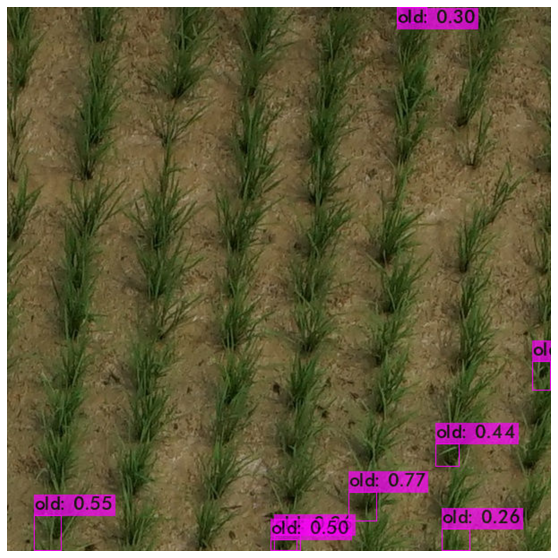

In [19]:
!./darknet detector test ../data/obj.data yolov4-test.cfg ../data/weights/weights_224/yolov4-custom_5000.weights ../data/valid/DSC080454.JPG

imshow('predictions.jpg')

In [ ]:
%cd /content/
!ls

/content
darknet  drive	sample_data  test_public  test.txt  yolov4-custom_last.weights


#開始預測 (資料集)
#將預測結果以txt輸出

建立txt檔，記錄所有要預測圖片的路徑

In [ ]:
#test_img_to_list
import math
import glob

path = "rice_data/private/"
with open(path + "../private.txt", "w") as fp:
  for i in glob.glob(path+'*.JPG'):
    print(i)
    fp.write(i+'\n')
fp.close()

執行

In [ ]:
!./darknet detector test rice_data/obj.data yolov4-rice.cfg rice_data/weights/yolov4-rice_52.weights  -thresh 0.05 -dont_show -save_labels < rice_data/private.txt